# Πότε Παίρνουν Ταξί οι Νεοϋορκέζοι;

* Εμπνευσμένο από το κεφάλαιο 2 του βιβλίου του Cyrille Rossant, Learning IPython for Interactive Computing and Data Visualization, 2η έκδοση, Packt Publishing, 2015.

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Θα δούμε τη λειτουργικότητα της *ομαδοποίησης* (group by).

* Η λειτουργικότητα αυτή είναι αντίστοιχη της αντίστοιχης δυνατότητας που δίνεται στις σχεσιακές βάσεις δεδομένων.

```sql
SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2
```

* Για να δούμε τη λειτουργικότητα στο pandas θα κατασκευάσουμε οι ίδιοι ένα μικρό `DataFrame`.

In [2]:
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                   'key2': ['one', 'two', 'one', 'two', 'one'],
                   'data1': np.random.randn(5),
                   'data2': np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.190554,-0.253734
1,a,two,-0.415527,0.677994
2,b,one,-0.951960,1.172988
3,b,two,0.219370,-0.318523
4,a,one,0.437225,0.155445


* Ομαδοποιούμε κατά `key1`.

In [3]:
grouped = df.groupby('key1')

for name, group in grouped:
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -1.190554 -0.253734
1    a  two -0.415527  0.677994
4    a  one  0.437225  0.155445
b
  key1 key2    data1     data2
2    b  one -0.95196  1.172988
3    b  two  0.21937 -0.318523


* Μπορούμε πολύ εύκολα να υπολογίσουμε κάποια συγκεντρωτική τιμή για κάθε ομάδα.

In [5]:
grouped.mean(numeric_only=True)

,data1,data2
key1,,
a,-0.389619,0.193235
b,-0.366295,0.427233


* Προχωράμε στην ομαδοποίηση κατά `key1` και `key2`.

In [6]:
grouped = df.groupby(['key1', 'key2'])

for (k1, k2), group in grouped:
    print(k1, k2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one -1.190554 -0.253734
4    a  one  0.437225  0.155445
a two
  key1 key2     data1     data2
1    a  two -0.415527  0.677994
b one
  key1 key2    data1     data2
2    b  one -0.95196  1.172988
b two
  key1 key2    data1     data2
3    b  two  0.21937 -0.318523


* Οπότε πάλι οι μέσοι όροι:

In [7]:
grouped.mean()

data1     data2
key1 key2                    
a    one  -0.376665 -0.049145
     two  -0.415527  0.677994
b    one  -0.951960  1.172988
     two   0.219370 -0.318523

* Για κάτι πιο ρεαλιστικό, θα περάσουμε σε ένα διαφορετικό σύνολο δεδομένων.

* Αφορούν στοιχεία από επισκέψεις σε εστιατόρια στη Νέα Υόρκη, πριν από αρκετά χρόνια, έτσι όπως έχουν καταγραφεί στο βιβλίο των Bryant, P. G. και Smith, M. A. (1995), Practical Data Analysis: Case Studies in Business Statistics, Richard D. Irwin Publishing, Homewood, IL.

In [8]:
tips = pd.read_csv("tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


* Θα προσθέσουμε το ποσοστό του λογαριασμού που αντιστοιχεί στο φιλοδώρημα.

* Με την ευκαιρία βλέπουμε πώς δημιουργούμε νέες στήλες σε ένα `DataFrame`.

In [9]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


* Τώρα μπορούμε να ομαδοποιήσουμε με βάση το φύλλο και το αν πρόκειται για καπνιστή.

In [10]:
grouped = tips.groupby(['sex', 'smoker'])

* Μπορούμε να δούμε την τυπική απόκλιση και μέσο για κάθε ομάδα, για όλες τις στήλες που μπορεί να υπολογιστούν:

In [12]:
numeric_cols = tips.select_dtypes(include=[np.number]).columns
grouped[numeric_cols].agg(['mean', 'std'])

total_bill                 tip                size            \
                    mean       std      mean       std      mean       std   
sex    smoker                                                                
Female No      18.105185  7.286455  2.773519  1.128425  2.592593  1.073146   
       Yes     17.977879  9.189751  2.931515  1.219916  2.242424  0.613917   
Male   No      19.791237  8.726566  3.113402  1.489559  2.711340  0.989094   
       Yes     22.284500  9.911845  3.051167  1.500120  2.500000  0.892530   

                tip_pct            
                   mean       std  
sex    smoker                      
Female No      0.156921  0.036421  
       Yes     0.182150  0.071595  
Male   No      0.160669  0.041849  
       Yes     0.152771  0.090588

* Επιστρέφουμε τώρα στο γνώριμο σύνολο δεδομένων με τις διαδρομές των ταξί.

In [13]:
taxis = pd.read_csv("nyc_taxi_trip_data_sample.csv.zip")

* Υπήρχαν δύο στήλες οι οποίες είχαν δεδομένα ημερομηνίας και ώρας:

  * `pickup_datetime`
  * `dropoff_datetime`
  
* Ας εξετάσουμε την `pickup_datetime`.

In [14]:
taxis.pickup_datetime

0          2013-10-04 20:20:00
1          2013-09-27 14:16:04
2          2013-07-18 13:24:37
3          2013-06-25 12:12:00
4          2013-04-19 05:28:00
                  ...         
1731792    2013-08-02 03:34:00
1731793    2013-02-21 12:44:00
1731794    2013-02-16 17:24:00
1731795    2013-05-24 10:29:16
1731796    2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: object

* Αν παρατηρήσουμε, ο τύπος (`dtype`) της στήλης (`Series`) `pickup_datetime` είναι `object`.

* Εμείς θέλουμε να τη χειριστούμε ως ημερομηνία και ώρα.

* Για να το κάνουμε αυτό, πρέπει να το δηλώσουμε κατά τη δημιουργία του `DataFrame`.

In [15]:
taxis.pickup_datetime

0          2013-10-04 20:20:00
1          2013-09-27 14:16:04
2          2013-07-18 13:24:37
3          2013-06-25 12:12:00
4          2013-04-19 05:28:00
                  ...         
1731792    2013-08-02 03:34:00
1731793    2013-02-21 12:44:00
1731794    2013-02-16 17:24:00
1731795    2013-05-24 10:29:16
1731796    2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: object

In [16]:
taxis = pd.read_csv("nyc_taxi_trip_data_sample.csv.zip", 
                    parse_dates=['pickup_datetime', 'dropoff_datetime'])
taxis

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Για να δούμε τώρα τον τύπο της στήλης `pickup_datetime`:

In [17]:
taxis.pickup_datetime

0         2013-10-04 20:20:00
1         2013-09-27 14:16:04
2         2013-07-18 13:24:37
3         2013-06-25 12:12:00
4         2013-04-19 05:28:00
                  ...        
1731792   2013-08-02 03:34:00
1731793   2013-02-21 12:44:00
1731794   2013-02-16 17:24:00
1731795   2013-05-24 10:29:16
1731796   2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: datetime64[ns]

* Από τη στιγμή που μία στήλη είναι τύπου `datetime`, μπορούμε χρησιμοποιώντας το επίθεμα `.dt` να χρησιμοποιήσουμε μια πληθώρα μεθόδων για ημερολογιακά δεδομένα.

* Προσοχή: *δεν κάνουμε ποτέ υπολογισμούς με ημερολογιακά δεδομένα «με το χέρι»*. Μόνο με βιβλιοθήκες!

* Εδώ θα ομαδοποιήσουμε τα δεδομένα μας ανά εβδομάδα.

In [18]:
weekly = taxis.groupby(taxis.pickup_datetime.dt.isocalendar().week)
len(weekly)

52

* Πήραμε λοιπόν μία ομάδα για κάθε εβδομάδα, με τις διαδρομές που έγιναν στην εβδομάδα αυτή.

* Για να μετρήσουμε πόσες διαδρομές έγιναν, αρκεί να χρησιμοποιήσουμε τη μέθοδο `size()` στην κάθε ομάδα.

In [19]:
y = weekly.size()
y.head(3)

week
1    35125
2    32415
3    34478
dtype: int64

* Για να δούμε τι διάγραμμα μπορούμε να φτιάξουμε με βάση αυτά.

<Axes: >

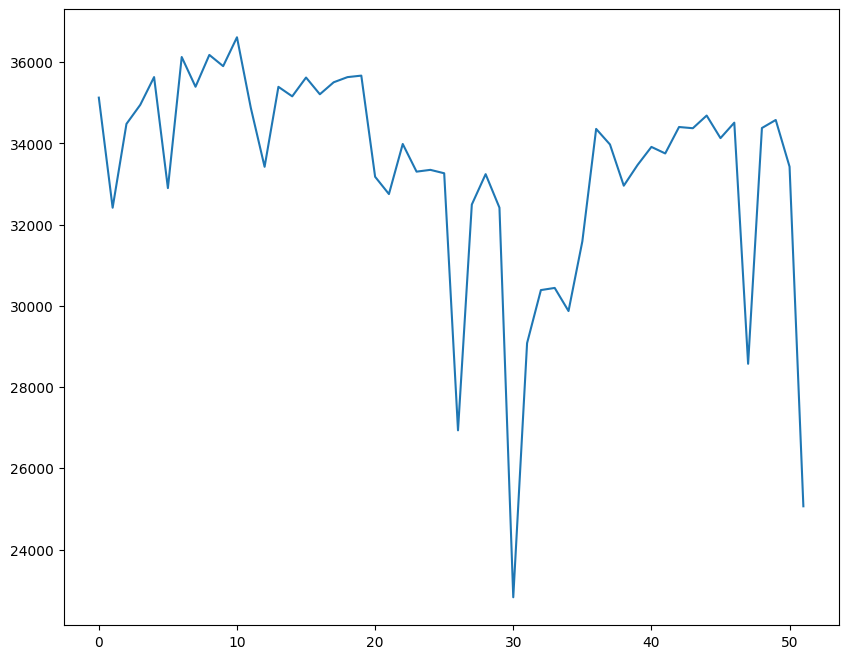

In [20]:
pd.Series(y.values).plot(figsize=(10, 8))

* Το διάγραμμα είναι σωστό, αλλά υπάρχει ένα πρόβλημα.

* Στον οριζόντιο άξονα αναγράφεται ο αύξων αριθμός της εβδομάδας.

* Αυτό δεν είναι πολύ βολικό, γιατί μπορεί να μην θυμόμαστε πότε μέσα στο χρόνο πέφτει, για παράδειγμα, η 13η εβδομάδα.

* Για να λύσουμε το πρόβλημα, στον οριζόντιο άξονα θα βάλουμε τη χρονική στιγμή στην οποία ξεκινάει η κάθε εβδομάδα της κάθε ομάδας.

In [21]:
x = weekly.pickup_datetime.min()
x[:3]

week
1   2013-01-01 00:00:00
2   2013-01-07 00:00:29
3   2013-01-14 00:00:00
Name: pickup_datetime, dtype: datetime64[ns]

* Παρατηρούμε ότι η πρώτη εβδομάδα της χρονιάς περιέχει έξι ημέρες, και όχι επτά.

* Αυτό εξηγείται γιατί το 2013 ξεκίνησε Τρίτη.

In [22]:
x.loc[1].day_name()

'Tuesday'

* Τώρα στο διάγραμμα μπορούμε να βάλουμε κάτι πιο κατανοητό στον οριζόντιο άξονα.

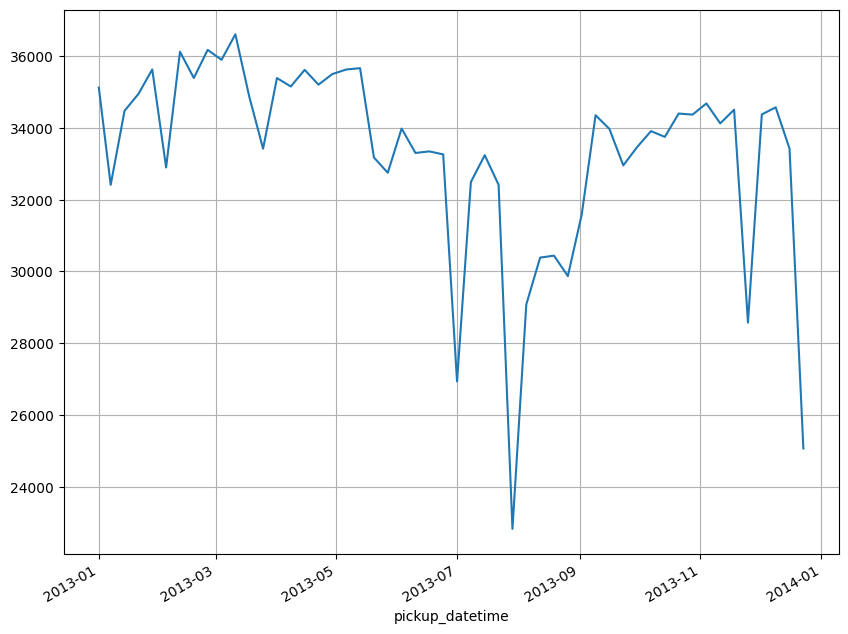

In [23]:
pd.Series(y.values, index=x).plot(figsize=(10, 8))
plt.grid()

* Αν περάσουμε από το μήνα στις ημέρες της εβδομάδας, πόση είναι η κίνηση στα ταξί;

* Αρκεί να ομαδοποιήσουμε ακριβώς ανά ημέρα μέσα στην εβδομάδα.

In [24]:
dayofweek_rides = taxis.groupby(taxis.pickup_datetime.dt.dayofweek)
len(dayofweek_rides)

7

* Και να μετρήσουμε πόσες διαδρομές έγιναν σε κάθε ημέρα της εβδομάδας.

In [25]:
day_of_week_rides_num = dayofweek_rides.size()
day_of_week_rides_num

pickup_datetime
0    224342
1    246768
2    249750
3    255900
4    263773
5    262127
6    229137
dtype: int64

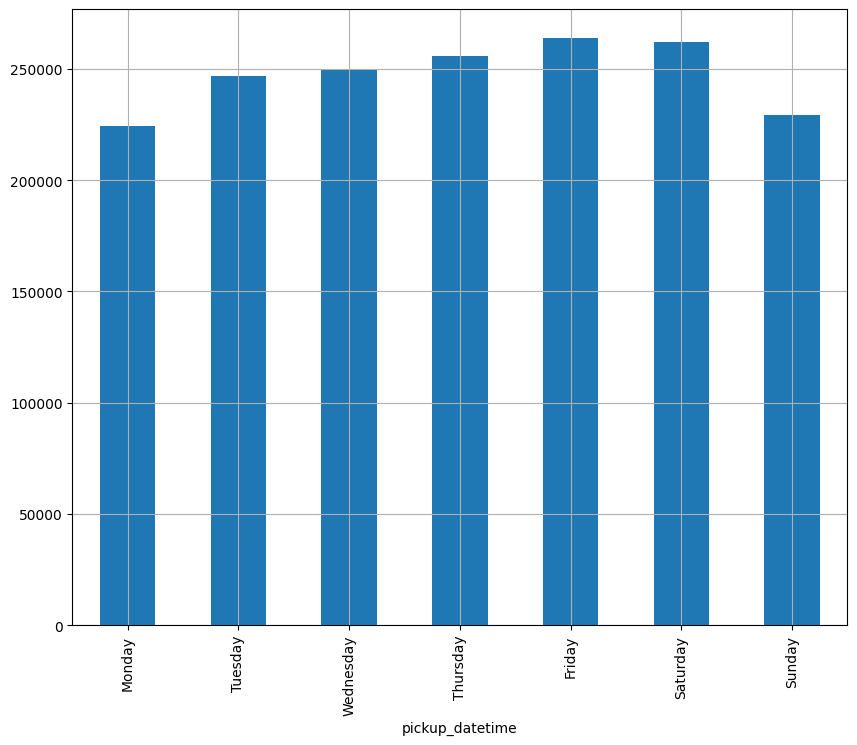

In [26]:
day_of_week_rides_num.plot(kind='bar', figsize=(10, 8))
plt.gca().set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid()

* Αντίστοιχα μπορούμε να δούμε και την κατάσταση ανά ώρα.

In [27]:
hourly_rides = taxis.groupby(taxis.pickup_datetime.dt.hour)
len(hourly_rides)

24

* Κάνουμε την καταμέτρηση:

In [28]:
hourly_rides_num = hourly_rides.size()
hourly_rides_num

pickup_datetime
0      69279
1      50967
2      38098
3      27537
4      20058
5      17475
6      35918
7      62327
8      77968
9      80253
10     78149
11     80642
12     85324
13     84133
14     86588
15     83057
16     69029
17     83954
18    104198
19    108802
20    103391
21    100562
22     97859
23     86229
dtype: int64

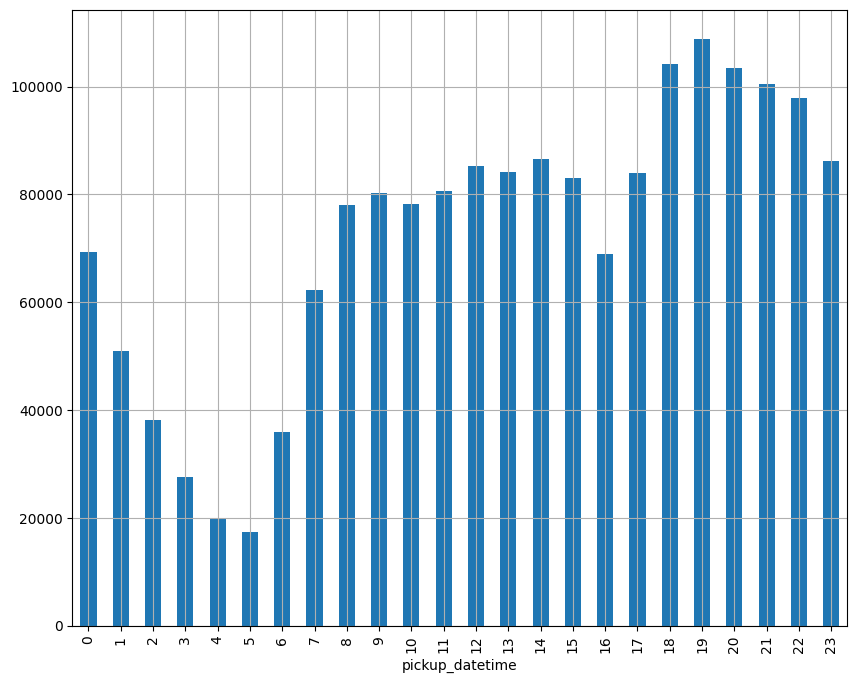

In [29]:
hourly_rides_num.plot.bar(figsize=(10, 8))
plt.grid()